<a href="https://colab.research.google.com/github/dinog0d/Lab_Biose_Dinoequipo/blob/main/Practica_3/P3_AnnyRaigoza_DaironMontes_LauraLlanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

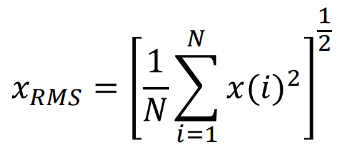

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como: x_RMS = (((1/N) * sum from i=1 to N of ((x(i))^2))^(1/2))

In [ ]:
#Importamos las librerías que necesitemos para operar
import numpy as np
import matplotlib.pyplot as plt

def calculoRMS(x):
    N = len(x)  # Número de muestras
    xi2 = np.sum(x**2)  # Suma de los cuadrados de las muestras
    rms = np.sqrt(xi2 / N)  # Cálculo del valor RMS
    return rms

In [ ]:
#BIBLIOTECA SCIPY
#Tiene funciones de filtrado para eliminar ruido o interferencias, así como para detectar eventos importantes para la interpretación correcta de las señales.
import scipy

#Al subir el archivo .mat al entorno de Google Colab mediante la función de carga de archivos, se leen los datos con ayuda de la biblioteca scipy.io
from google.colab import files
archivoSubido = files.upload()
datosMATLAB = scipy.io.loadmat('/content/signals.mat')
# El registro correspondiente a las señales tal cual se registraron corresponde al campo asRecording de los archivos entregados.
# Las señales se sometieron a un proceso de filtrado el cual corresponde al campo filtered.
datosECG=datosMATLAB['ECG_asRecording']
ECGfiltrada=datosMATLAB['ECG_filtered']

#Visualización de los datos
filas, columnas = ECGfiltrada.shape
n_filas=filas
n_columnas=columnas
print(n_columnas)
print(n_filas)

Saving signals.mat to signals (2).mat
30720
1


Determine el tiempo de duración de las señales, cree un vector de tiempo

---



In [ ]:
# La frecuencia de muestreo indica el número de muestras por segundo. Al obtener el número total de muestras en la señal
# mediante la función signal.size podemos encontrar la duración si dividimos el número de muestras entre 1024Hz.
numeroMuestras = ECGfiltrada.size
duracion = numeroMuestras / 1024
tiempo = np.arange(0, duracion, (1/1024))
print("La duración de la señal ECG es de: ", duracion, "segundos")
print("Vector de tiempo: ", tiempo)

La duración de la señal ECG es de:  30.0 segundos
Vector de tiempo:  [0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y escriba cómo debe ser el comportamiento del filtro que se utilizó.

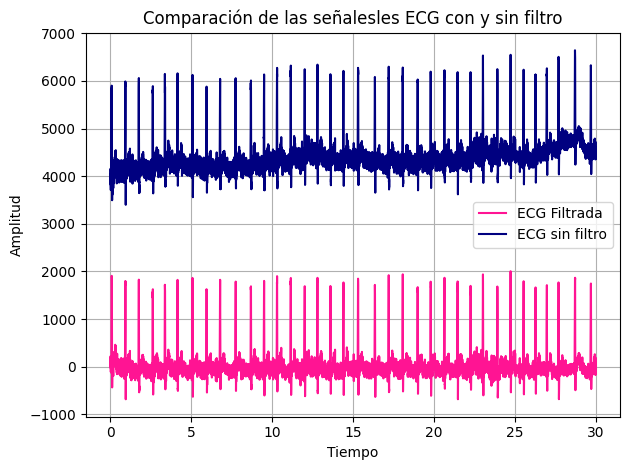

In [ ]:
# La función .flatten() es un método que se utiliza en Python para convertir una estructura de datos multidimensional en una estructura unidimensional
# Convertirmos nuestro array en un formato unidimensional para poder graficar.
sinFiltro = datosECG.flatten()
conFiltro = ECGfiltrada.flatten()

# Visualización
plt.plot(tiempo, conFiltro, color='deeppink', label='ECG Filtrada')
plt.plot(tiempo, sinFiltro, color='navy', label='ECG sin filtro')
plt.title('Comparación de las señalesles ECG con y sin filtro')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.legend()
plt.show()

# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 ‧… ANNY ANALIZA PLIS - - - - - - - - - - - - - - -- - -
# Explicación
print("""EXPLICACIÓN.\n""")

Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

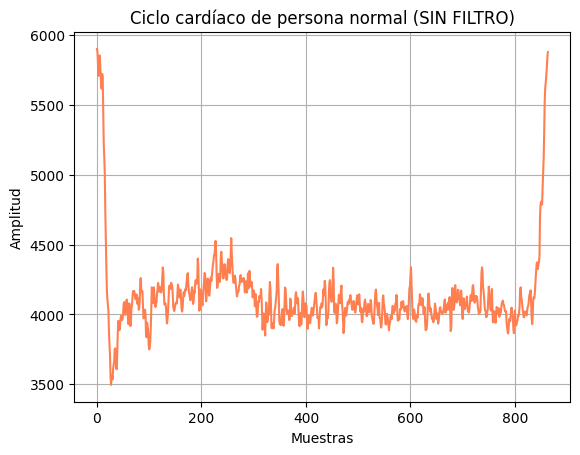


El valor RMS de la señal ECG es:  4139.957959761407
El valor promedio de la señal ECG es:  4129.067576373065
La desviación estándar de la señal ECG es:  90157.20695566053
La varianza de la señal ECG es:  300.2618972757958
ANÁLISIS.



In [ ]:
#La duración de un ciclo cardíaco puede variar dependiendo de la frecuencia cardíaca de una persona.
#La frecuencia cardíaca promedio es de 0.857 segundos aproximadamente
#Referencia. https://courses.lumenlearning.com/suny-ap2/chapter/cardiac-cycle/#:~:text=The%20cardiac%20cycle%20comprises%20a,atrioventricular%20valves%20into%20the%20ventricles.

#Para un periodo de muestreo T=1/1024
tiempoCiclo= np.arange(0, 1, 1/1024)
cicloCardiaco = sinFiltro[0:tiempoCiclo.size]
#Función para identificar los picos (o máximos locales) en una serie de datos
from scipy.signal import find_peaks
picosCiclo=find_peaks(cicloCardiaco, distance=800)
#Se recorta el tiempo a la distancia entre dos picos
cicloPicos = cicloCardiaco[88:952]
tiempoPicos= np.arange(0, len(cicloPicos))

# Visualización
#plt.plot(tiempoCiclo, cicloCardiaco, color='darksalmon')
plt.plot(tiempoPicos, cicloPicos, color='coral')
plt.title('Ciclo cardíaco de persona normal (SIN FILTRO)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

rmsCiclo = calculoRMS(cicloPicos)
print("\nEl valor RMS de la señal ECG es: ", rmsCiclo)
import statistics
promedioCiclo = statistics.mean(cicloPicos)
print("El valor promedio de la señal ECG es: ", promedioCiclo)
desviaciónCiclo = statistics.variance(cicloPicos)
print("La desviación estándar de la señal ECG es: ", desviaciónCiclo)
varianzaCiclo = statistics.stdev(cicloPicos)
print("La varianza de la señal ECG es: ", varianzaCiclo)

# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 ‧… ANNY ANALIZA PLIS - - - - - - - - - - - - - - -- - -
# Explicación
print("""ANÁLISIS.\n""")

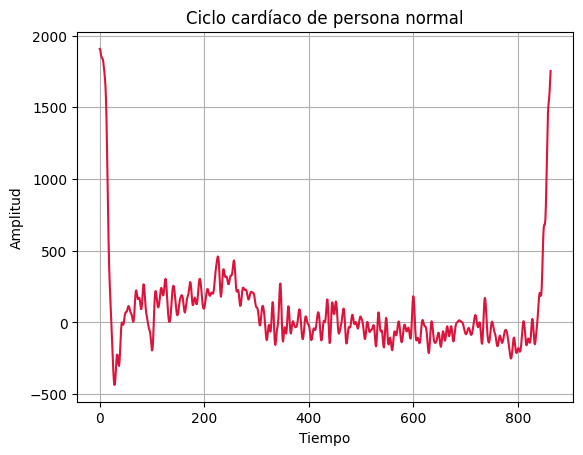


El valor RMS de la señal ECG es:  319.62757818893766
El valor promedio de la señal ECG es:  74.00995782055861
La desviación estándar de la señal ECG es:  96796.34769215346
La varianza de la señal ECG es:  311.12111418570333


In [ ]:
#Para un periodo de muestreo T=1/1024
tiempoCiclo= np.arange(0, 1, 1/1024)
cicloCardiaco = conFiltro[0:tiempoCiclo.size]
#Función para identificar los picos (o máximos locales) en una serie de datos
from scipy.signal import find_peaks
picosCiclo=find_peaks(cicloCardiaco, distance=800)
#Se recorta el tiempo a la distancia entre dos picos
cicloPicos = cicloCardiaco[88:952]
tiempoPicos= np.arange(0, len(cicloPicos))

# Visualización
#plt.plot(tiempoCiclo, cicloCardiaco, color='rosybrown')
plt.plot(tiempoPicos, cicloPicos, color='crimson')
plt.title('Ciclo cardíaco de persona normal (FILTRO)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

rmsCiclo = calculoRMS(cicloPicos)
print("\nEl valor RMS de la señal ECG es: ", rmsCiclo)
import statistics
promedioCiclo = statistics.mean(cicloPicos)
print("El valor promedio de la señal ECG es: ", promedioCiclo)
desviaciónCiclo = statistics.variance(cicloPicos)
print("La desviación estándar de la señal ECG es: ", desviaciónCiclo)
varianzaCiclo = statistics.stdev(cicloPicos)
print("La varianza de la señal ECG es: ", varianzaCiclo)

# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 ‧… ANNY ANALIZA PLIS - - - - - - - - - - - - - - -- - -
# Explicación
print("""ANÁLISIS.\n""")

In [ ]:
# - - - -- - - -  - - - - --  - - - -- - - - ૮ ˶ᵔ ᵕ ᵔ˶ ა 𐙚 ‧… ANNY ANALIZA PLIS - - - - - - - - - - - - - - -- - -
# Explicación
print("""COMPARACIÓN DE RESULTADOS ENTRE AMBAS SEÑALES.\n""")

 Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?

In [ ]:
import statistics
from scipy.signal import find_peaks

for i in range(0,15):
  tiempoCiclo= np.arange(i, i+1, 1/1024)
  cicloCardiaco = conFiltro[0:tiempoCiclo.size]
  picosCiclo=find_peaks(cicloCardiaco, distance=800)
  cicloPicos = cicloCardiaco[picosCiclo[0][0]:picosCiclo[0][1]]
  tiempoPicos= np.arange(i, len(cicloPicos))

  rmsCiclo = calculoRMS(cicloPicos)
  promedioCiclo = statistics.mean(cicloPicos)
  desviaciónCiclo = statistics.variance(cicloPicos)
  varianzaCiclo = statistics.stdev(cicloPicos)
  print("\nINFORMACIÓN DEL CICLO", i+1)
  print("El valor RMS de la señal ECG es: ", rmsCiclo)
  print("El valor promedio de la señal ECG es: ", promedioCiclo)
  print("La desviación estándar de la señal ECG es: ", desviaciónCiclo)
  print("La varianza de la señal ECG es: ", varianzaCiclo)


INFORMACIÓN DEL CICLO 1
El valor RMS de la señal ECG es:  319.62757818893766
El valor promedio de la señal ECG es:  74.00995782055861
La desviación estándar de la señal ECG es:  96796.34769215346
La varianza de la señal ECG es:  311.12111418570333

INFORMACIÓN DEL CICLO 2
El valor RMS de la señal ECG es:  319.62757818893766
El valor promedio de la señal ECG es:  74.00995782055861
La desviación estándar de la señal ECG es:  96796.34769215346
La varianza de la señal ECG es:  311.12111418570333

INFORMACIÓN DEL CICLO 3
El valor RMS de la señal ECG es:  319.62757818893766
El valor promedio de la señal ECG es:  74.00995782055861
La desviación estándar de la señal ECG es:  96796.34769215346
La varianza de la señal ECG es:  311.12111418570333

INFORMACIÓN DEL CICLO 4
El valor RMS de la señal ECG es:  319.62757818893766
El valor promedio de la señal ECG es:  74.00995782055861
La desviación estándar de la señal ECG es:  96796.34769215346
La varianza de la señal ECG es:  311.12111418570333

INF